In [2]:
import glob, os, re, json, pickle
import pandas as pd
from classifier import train_all, score_texts, DATADIR
%reload_ext autoreload
%autoreload 2

In [14]:
train_all()

Loading manifesto/manifesto-Germany.csv
Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    3.3s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    3.3s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.4s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    6.1s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    6.5s finished
/Users/felix/anaconda3/envs/covidstate/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
# print metrics
metrics_file = os.path.join(DATADIR, 'classifier-manifestolabel-metrics.csv')
metrics_df = pd.read_csv(metrics_file, header=0).T
metrics_df.columns = metrics_df.iloc[0,:]
metrics_df = metrics_df.iloc[1:,:]
metrics_df

Unnamed: 0,precision,recall,f1-score,support
agriculture +,0.717391,0.409091,0.521053,242
anti-growth economy +,0.455696,0.27,0.339089,400
anti-imperialism +,0,0,0,14
centralism +,0.428571,0.0535714,0.0952381,56
constitution +,0.615385,0.137931,0.225352,58
constitution -,0.5,0.0588235,0.105263,17
controlled economy +,0.666667,0.244898,0.358209,98
corporatism +,0.727273,0.111111,0.192771,72
culture +,0.583682,0.498214,0.537572,560
decentralism +,0.523333,0.433702,0.47432,362


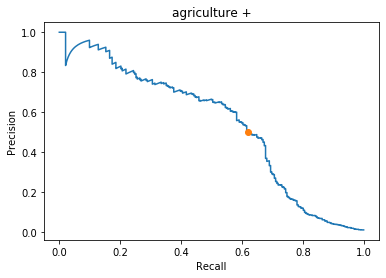

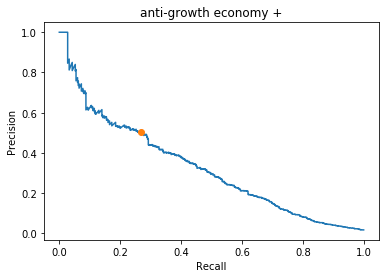

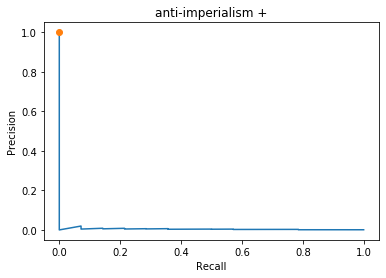

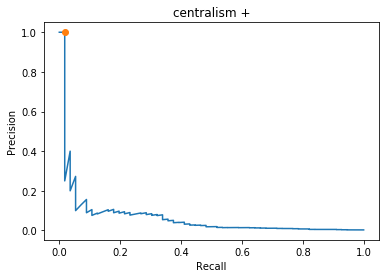

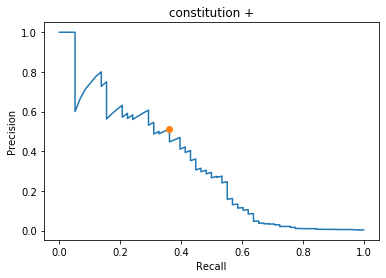

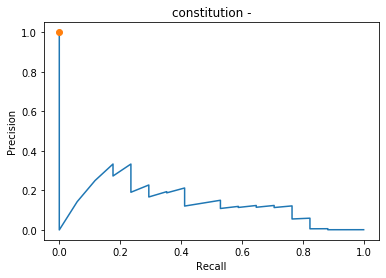

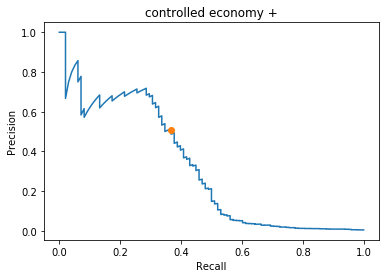

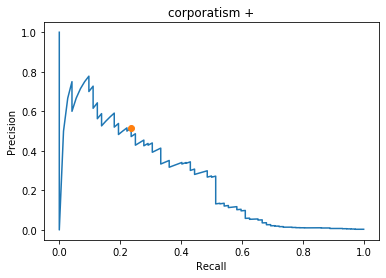

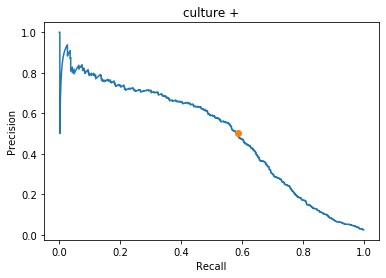

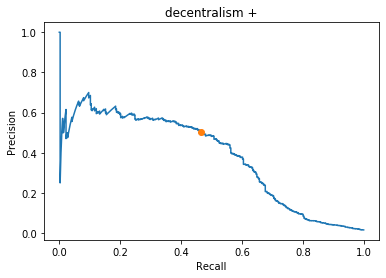

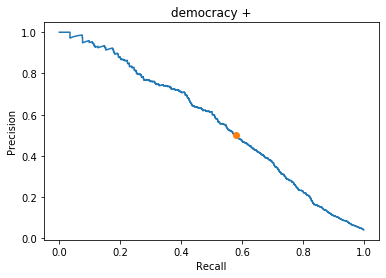

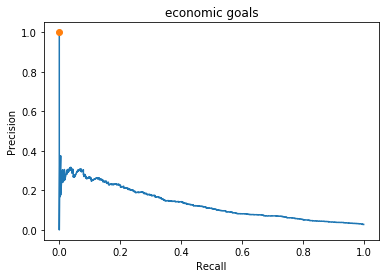

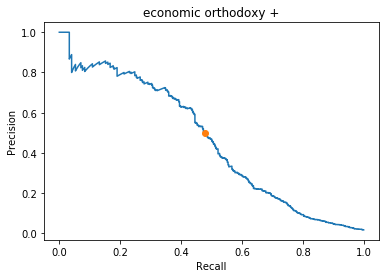

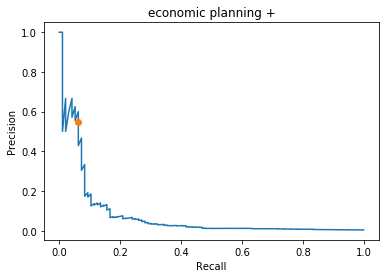

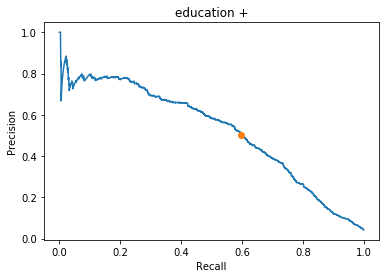

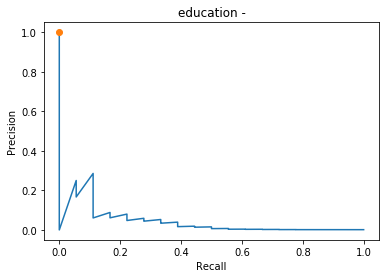

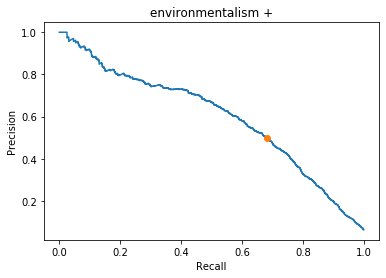

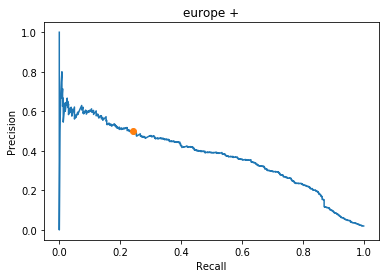

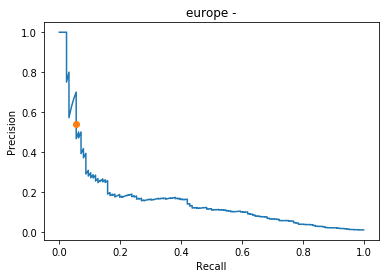

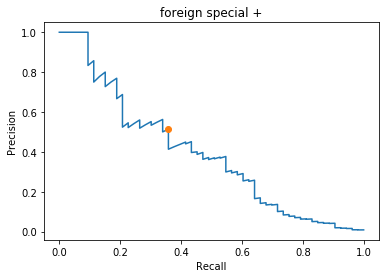

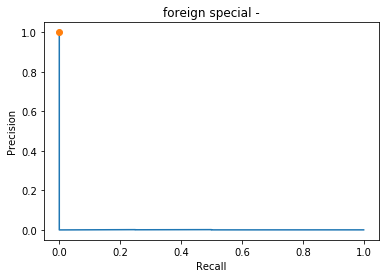

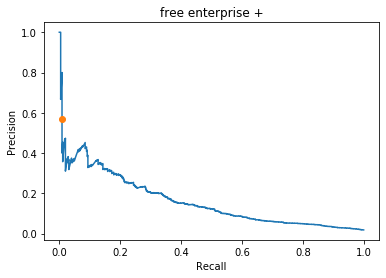

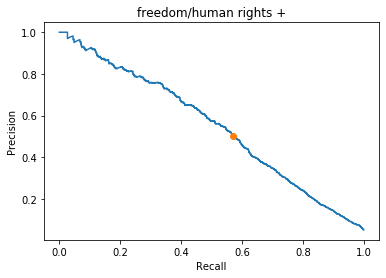

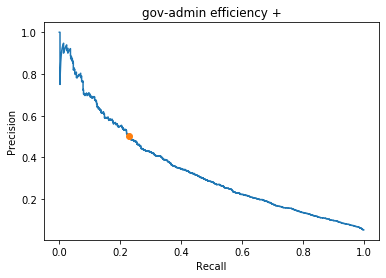

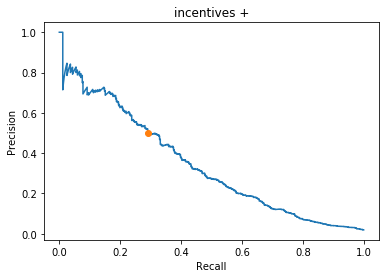

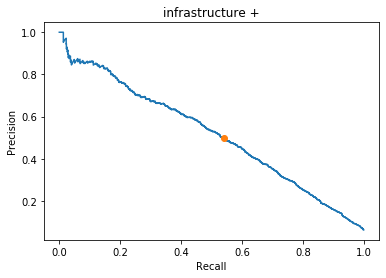

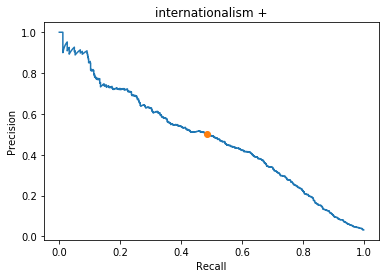

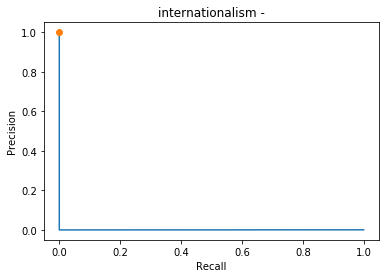

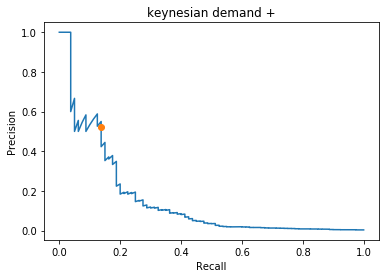

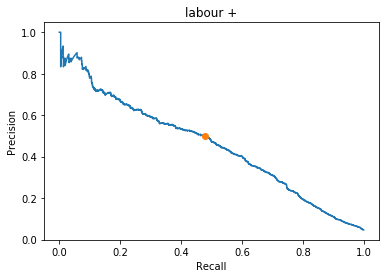

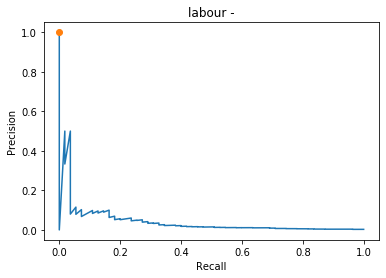

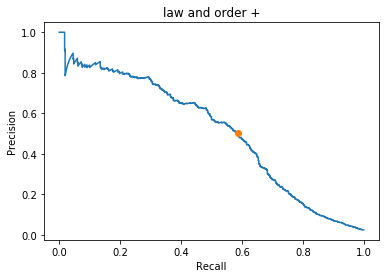

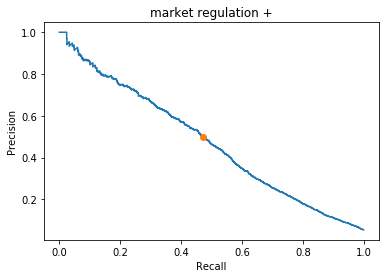

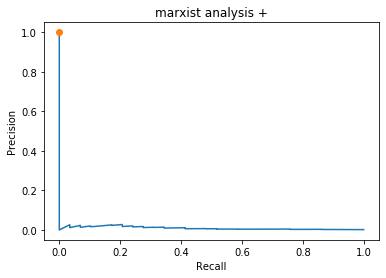

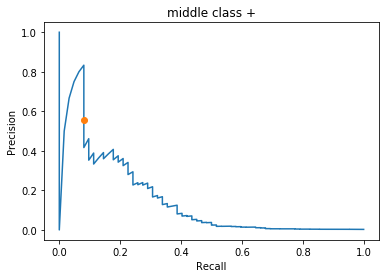

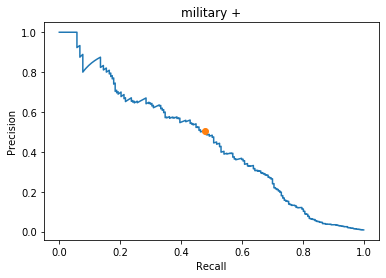

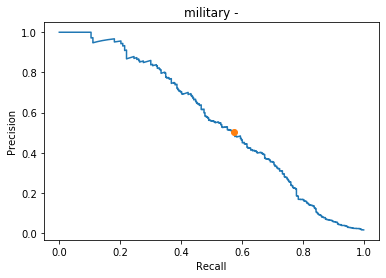

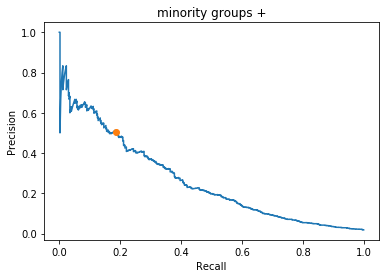

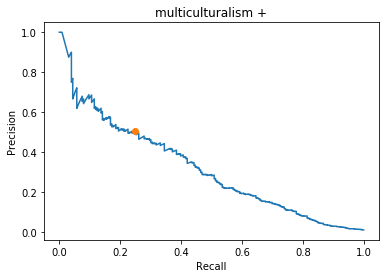

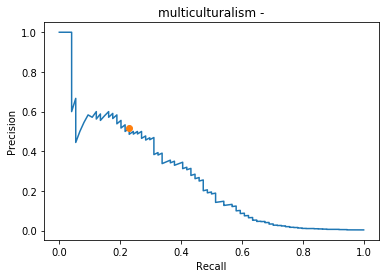

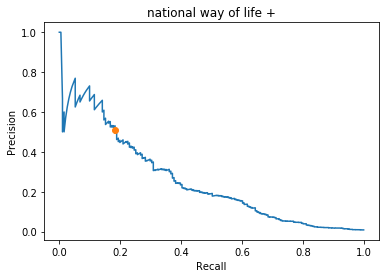

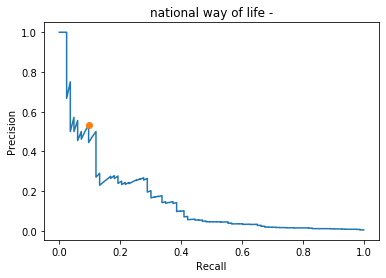

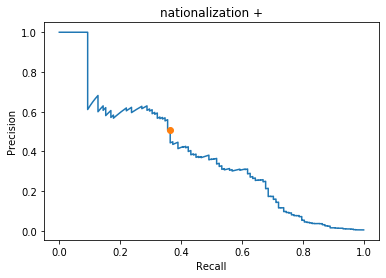

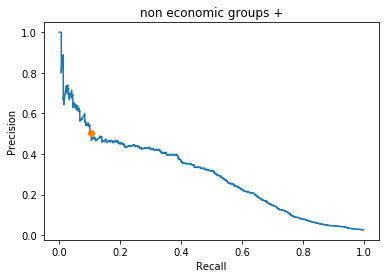

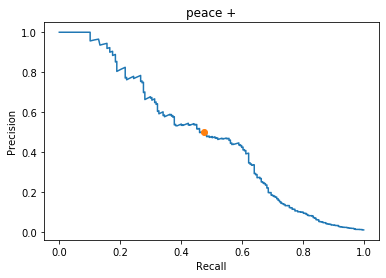

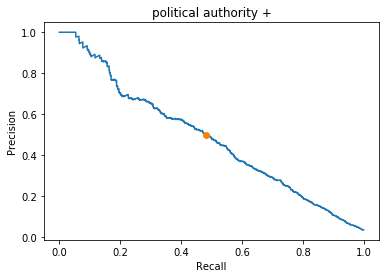

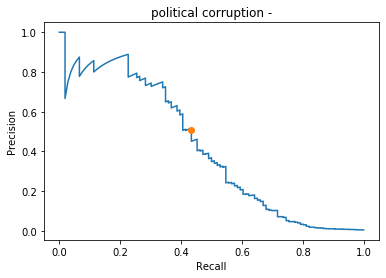

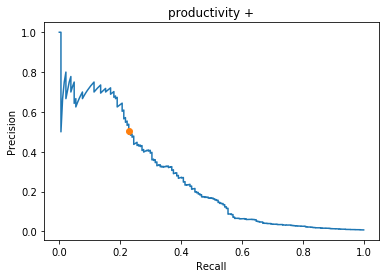

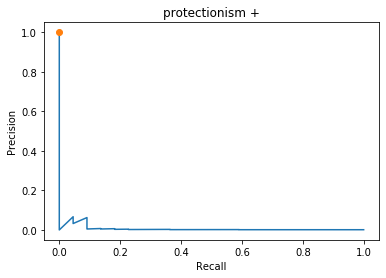

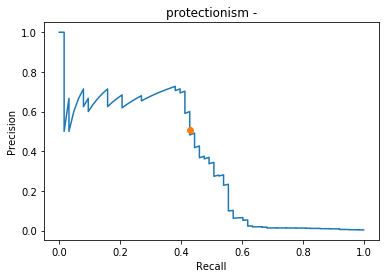

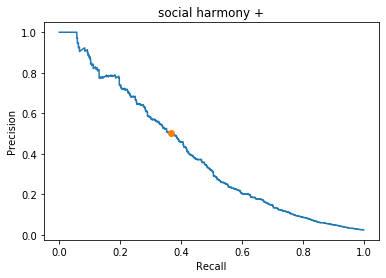

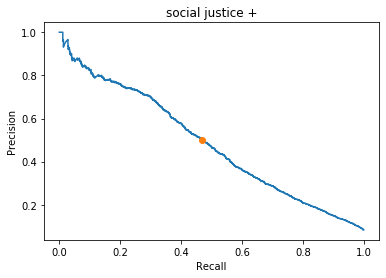

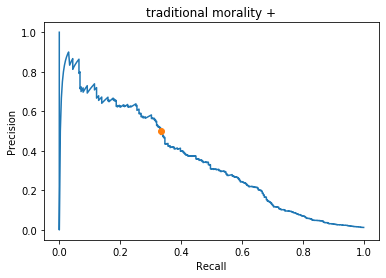

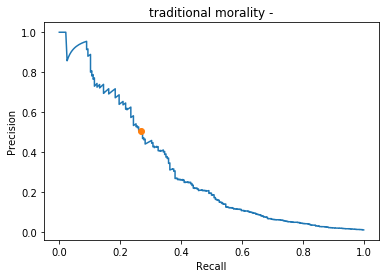

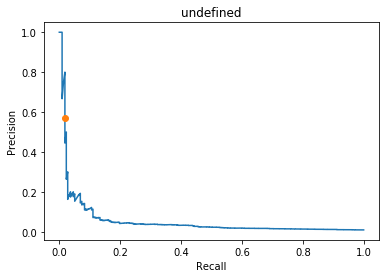

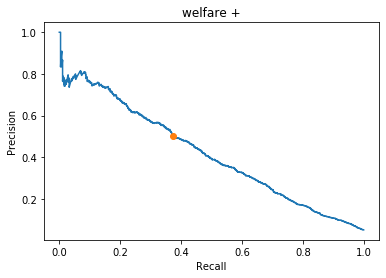

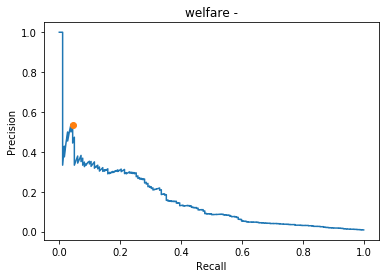

In [26]:
import matplotlib.pylab as plt
import pickle
%matplotlib inline

fn = os.path.join(DATADIR, 'classifier-manifestolabel-pr_curve.pickle')
pr_curves = pickle.load(open(fn,'rb'))
min_prec = .5

for label in pr_curves.keys():
    plt.clf()
    prec = pr_curves[label]['precisions']
    rec = pr_curves[label]['recall']
    thresh = pr_curves[label]['thresholds']
    prec_thresh = thresh[(prec > .5).nonzero()[0][0]-1]
    plt.plot(rec, prec)
    idx = (prec > .5).nonzero()[0][0]
    plt.plot(rec[idx],prec[idx],'o')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(label)
    plt.show()

In [3]:
df = pd.read_pickle('all_tweets.pickle')
(df.loc[df['after'],'manifestolabel_keywords'].value_counts() / df.loc[df['before'],'manifestolabel_keywords'].value_counts()).sort_values()

democracy +               0.808251
incentives +              0.862886
economic planning +       0.908220
political authority +     0.931937
education +               0.968680
foreign special -         0.981094
infrastructure +          1.008865
internationalism -        1.025767
national way of life -    1.035524
social justice +          1.063237
traditional morality +    1.075198
europe +                  1.076123
culture +                 1.083065
constitution +            1.088062
protectionism +           1.107905
social harmony +          1.151810
constitution -            1.160151
political corruption -    1.178049
non economic groups +     1.208427
military -                1.220866
national way of life +    1.222716
labour +                  1.234997
multiculturalism +        1.248649
marxist analysis +        1.267596
productivity +            1.270906
market regulation +       1.277793
multiculturalism -        1.309286
gov-admin efficiency +    1.312319
internationalism +  

In [6]:
df['text'] = df['text'].fillna('')
df_scored = score_texts(df, min_precision=.5)
df_scored.to_pickle('scored_tweets.pickle')

In [3]:
df_scored = pd.read_pickle('scored_tweets.pickle')
# len(df_scored.drop_duplicates('id'))

In [32]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 200)
above_precision_idx = df_scored['manifestolabel'] != ''
above_length_idx = df_scored['text'].apply(len) > 50
interacted_with = (df_scored['favorites'] > 10) | \
                    (df_scored['replies'] > 10) | \
                    (df_scored['retweets'] > 10)
valid = above_length_idx & above_precision_idx & interacted_with
df_scored.loc[valid,:].head(n=200)

<ipython-input-32-c804bee6e3f1>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,username,to,text,retweets,favorites,replies,id,permalink,author_id,formatted_date,...,manifestolabel_keywords,date,before,after,domain_proba,domain,rightleft_proba,rightleft,manifestolabel_proba,manifestolabel
17,FraktionGruenBW,FraktionGruenBW,"Die Wahrheit ist: Die SPD ist im Bund vor Seehofer eingeknickt. Sie hat mit der CDU/CSU das schärfste Migrationspaket beschlossen, das je durch den Bundestag gegangen ist! Wir baden im Land aus, was die GroKo im Bund verbockt hat.",0.0,17.0,4.0,1222993791063404545,https://twitter.com/FraktionGruenBW/status/1222993791063404545,4.257208e+08,Thu Jan 30 21:23:36 +0000 2020,...,internationalism -,2020-01-30 21:23:36,True,False,0.698848,Political System,0.935017,right,0.566356,political authority +
1796,BerlinReporter,Panthea2019,"Wenn wir nicht umsteuern, ja: USA und China werden das Klima retten mit Innovationen, während Deutschland mit Fahrverboten, Tempolimits, Elektroprämien und importierten Atom- und Kohlestrom von der Welt ausgelacht wird. #Klimaschutz",20.0,67.0,2.0,1220612299125338112,https://twitter.com/BerlinReporter/status/1220612299125338112,1.945555e+07,Fri Jan 24 07:40:24 +0000 2020,...,internationalism -,2020-01-24 07:40:24,True,False,0.433758,,0.792119,left,0.502315,environmentalism +
3851,joel_aktuell,None,"Trotzdem ist Ehrenamt ein Grundpfeiler unseres gesellschaftlichen Zusammenlebens, das nimmt, aber umso mehr gibt. Was wichtig sein könnte, um Menschen dafür zu interessieren, sind sog. Ehrenamtsbörsen, auf denen Vereine ihre Ziele/Arbeit vorstellen. Denn: Ehrenamt ist toll!",0.0,12.0,0.0,1217514277260746753,https://twitter.com/joel_aktuell/status/1217514277260746753,8.100213e+17,Wed Jan 15 18:29:58 +0000 2020,...,internationalism -,2020-01-15 18:29:58,True,False,0.737210,Fabric of Society,0.942562,right,0.541128,social harmony +
4964,ArzuQaderi,None,"""Wenn man die Natur wahrhaft liebt, so findet man es überall schön. Die Natur muss gefühlt werden. Die Natur betrügt uns nie."" - Vincent van Gogh #SundayMood #Throwback #Fotografie #Natur",3.0,63.0,19.0,1244215971302252544,https://twitter.com/ArzuQaderi/status/1244215971302252544,1.173347e+09,Sun Mar 29 10:52:58 +0000 2020,...,internationalism -,2020-03-29 10:52:58,False,True,0.828577,Welfare and Quality of Life,0.553190,left,0.645946,environmentalism +
8765,iTz_IKEV_Xz,None,"es ist einfach zu krass, wie manche in Deutschland die Aussagen die Merkel getätigt hat mit den Füßen treten!! Die Leute gehen trotzdem vor die Tür und feiern und treffen sich zum grillen. Einfach unfassbar. Manche haben die Lage noch nicht verstanden. #Covid_19",0.0,18.0,2.0,1240980170556747776,https://twitter.com/iTz_IKEV_Xz/status/1240980170556747776,3.015019e+09,Fri Mar 20 12:35:03 +0000 2020,...,internationalism -,2020-03-20 12:35:03,False,True,0.619658,Political System,0.912491,right,0.546318,political authority +
13542,Scacus_,AnjaHirschel,"Ich hab's schon vor Tagen gesagt, dass das jetzt Tür & Tor für weitere Überwachung öffnet. ""Leben oder Freiheit?"" Beides zusammen geht wohl nicht.. Es spricht für den (technischen) Fortschritt ja nichts gegen Statistiken, aber bitte ohne Bezug zur Identität des Einzelnen m.M.n.",1.0,26.0,1.0,1238731537119657985,https://twitter.com/Scacus_/status/1238731537119657985,7.768310e+07,Sat Mar 14 07:39:47 +0000 2020,...,internationalism -,2020-03-14 07:39:47,True,False,0.639682,Freedom and Democracy,0.980009,right,0.524001,freedom/human rights +
14050,moeller_laboe,None,"Asylrecht u. Flüchtlingsrecht wird immer in einen Topf geworfen. Asyl erhält der 'politisch' Verfolgte; Schutz vor Kriegshandlungen erhalten Flüchtlinge; diese haben, wenn sie aus Syrien flüchten, bereits in der Türkei, gem. Genfer Konvention, den Schutzstatus erreicht! ....",20.0,49.0,2.0,1238431362673229824,https://twitter.com/moeller_laboe/status/1238431362673229824,3.477072e+08,Fri Mar 13 11:47:00 +0000 2020,...,internationalism -,2020-03-13 11:47:00,True,False,0.774740,Freedom and Democracy,0.863906,right,0.577091,freedom/human rights +
1517

In [34]:
df_scored['tweet_with_url'] = '<a href=' + df_scored['permalink'] + '>Tweet: </a>' + df_scored['text']
df_scored.loc[valid,['tweet_with_url']]
# ?df_scored.loc[valid & (df_scored['urls']),['text','urls']]

,tweet_with_url
17,"<a href=https://twitter.com/FraktionGruenBW/status/1222993791063404545>Tweet: </a>Die Wahrheit ist: Die SPD ist im Bund vor Seehofer eingeknickt. Sie hat mit der CDU/CSU das schärfste Migrationspaket beschlossen, das je durch den Bundestag gegangen ist! Wir baden im Land aus, was die GroKo im Bund verbockt hat."
1796,"<a href=https://twitter.com/BerlinReporter/status/1220612299125338112>Tweet: </a>Wenn wir nicht umsteuern, ja: USA und China werden das Klima retten mit Innovationen, während Deutschland mit Fahrverboten, Tempolimits, Elektroprämien und importierten Atom- und Kohlestrom von der Welt ausgelacht wird. #Klimaschutz"
3851,"<a href=https://twitter.com/joel_aktuell/status/1217514277260746753>Tweet: </a>Trotzdem ist Ehrenamt ein Grundpfeiler unseres gesellschaftlichen Zusammenlebens, das nimmt, aber umso mehr gibt. Was wichtig sein könnte, um Menschen dafür zu interessieren, sind sog. Ehrenamtsbörsen, auf denen Vereine ihre Ziele/Arbeit vorstellen. Denn: Ehrenamt ist toll!"
4964,"<a href=https://twitter.com/ArzuQaderi/status/1244215971302252544>Tweet: </a>""Wenn man die Natur wahrhaft liebt, so findet man es überall schön. Die Natur muss gefühlt werden. Die Natur betrügt uns nie."" - Vincent van Gogh #SundayMood #Throwback #Fotografie #Natur"
8765,"<a href=https://twitter.com/iTz_IKEV_Xz/status/1240980170556747776>Tweet: </a>es ist einfach zu krass, wie manche in Deutschland die Aussagen die Merkel getätigt hat mit den Füßen treten!! Die Leute gehen trotzdem vor die Tür und feiern und treffen sich zum grillen. Einfach unfassbar. Manche haben die Lage noch nicht verstanden. #Covid_19"
...,...
180120,"<a href=https://twitter.com/JohannesBln/status/1249047482752999424>Tweet: </a>Niemand: Absolut niemand: Menschen, die die @rbbabendschau nachts in Berlin antrifft: #coronavirus #COVID2019"
213105,<a href=https://twitter.com/rlpNews/status/1227615820051812352>Tweet: </a>Auch im Kulturbereich ist #Ehrenamt unverzichtbar. MP #Dreyer besucht bei ihrer #RLPTour ehrenamtlich geleitetes Westpfälzer Musikantenmuseum.
235880,"<a href=https://twitter.com/felixsschulz/status/1225453064171245574>Tweet: </a>4 Rechte, darunter 1 Faschist, gegen 2 Linke. Ein Trauerspiel."
247075,"<a href=https://twitter.com/ZionHDev/status/1249797106279350273>Tweet: </a>Wie soll das mit den Schulen ab nächste Woche funktionieren? Es fängt ja schon da an, wie die Schüler in die Schule kommen. Durch die ausgedünnten Fahrpläne der Verkehrsbetriebe sind in den Bussen und Bahnen noch mehr Schüler auf noch engeren Raum."


In [35]:
df_scored.loc[valid,['tweet_with_url']].to_json('tweets_with_permalink.json')

In [52]:
df_scored.loc[valid, 'manifestolabel'].value_counts()

environmentalism +        986
political authority +     438
education +               409
democracy +               354
freedom/human rights +    297
social justice +          169
culture +                 111
infrastructure +           99
agriculture +              63
traditional morality +     60
labour +                   60
market regulation +        41
peace +                    40
law and order +            38
europe +                   21
social harmony +           18
gov-admin efficiency +     18
internationalism +         18
non economic groups +      14
anti-growth economy +      13
welfare +                  13
economic orthodoxy +        9
productivity +              6
minority groups +           3
controlled economy +        3
decentralism +              3
military +                  1
military -                  1
nationalization +           1
Name: manifestolabel, dtype: int64

In [53]:
df_scored[valid].to_csv('tweets_with_urls_precision60.csv',index=False)
df = df_scored[valid]

In [45]:
df['text']

17        Die Wahrheit ist: Die SPD ist im Bund vor Seeh...
20        Logisch, den politischen Gegener mit allen Mit...
54        Wir baden im Land aus, was die GroKo im Bund v...
181       „Wir lieben Europa, wir hassen nur die Europäi...
188       Mann sollte die Patienten mehr einbeziehen, di...
                                ...                        
262233    Ich mag Ramelow persönlich. Und er war ein gut...
263387    Dann hoffen wir mal, dass das Geheule der #SPD...
265273                             Jedes Jahr das gleiche. 
266880    Politik auch am Montagabend nach 12 Stunden Pr...
266958    Die #spd ist an Feigheit nicht zu überbieten.w...
Name: text, Length: 12242, dtype: object

In [30]:
(df.loc[df['after'],'manifestolabel_keywords'].value_counts() / df.loc[df['before'],'manifestolabel_keywords'].value_counts()).sort_values()

democracy +               0.240385
minority groups +         0.250000
constitution +            0.400000
social harmony +          0.466667
economic planning +       0.500000
foreign special -         0.500000
political authority +     0.525040
internationalism -        0.567474
market regulation +       0.625000
infrastructure +          0.666667
economic goals            0.675676
multiculturalism +        0.714286
national way of life -    0.725589
education +               0.740741
internationalism +        0.766520
corporatism +             0.777778
social justice +          0.788235
protectionism +           0.800000
welfare -                 0.808081
environmentalism +        0.822222
welfare +                 0.859375
keynesian demand +        0.888889
culture +                 0.897810
middle class +            0.900621
productivity +            0.902174
marxist analysis +        0.913043
traditional morality -    0.925532
national way of life +    0.980282
constitution -      

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
stopwords = [x.strip() for x in open('stopwords.txt').readlines()[7:]]
vect = CountVectorizer(stop_words=stopwords).fit(df['text'])
before_words = vect.transform(df.loc[df['before'],'text'])
after_words = vect.transform(df.loc[df['after'],'text'])

/Users/felix/anaconda3/envs/covidstate/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:382: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bsp', 'ca', 'hen', 'kurgan', 'matveev', 'solc'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [32]:
import numpy as np
keywords = pd.read_csv('keywords.csv')
all_keywords = pd.Series(keywords.values.flatten()).dropna().to_list()
idx2word = {v:k for k,v in vect.vocabulary_.items()}

In [33]:
before = np.array(before_words.sum(axis=0)) + 1
before = before / before.max()
after = np.array(after_words.sum(axis=0)) + 1
after = after / after.max()
increase = (after / before).flatten()
inc_idx = [idx for idx in increase.argsort() if idx2word[idx] in all_keywords]

In [34]:
top = 1000
most_increase = {idx2word[i]:increase[i] for i in inc_idx[-top:-1:] }
least_increase = {idx2word[i]:increase[i] for i in inc_idx[:top]}
# print(most_increase)
# print(least_increase)
pd.Series(most_increase).to_csv('increased.csv')
pd.Series(least_increase).to_csv('decreased.csv')

In [35]:
pd.Series(keywords.values.flatten()).dropna()

0        landwirtschaft
1        nachhaltigkeit
2             gottfried
3                  bund
4           grundgesetz
             ...       
1115               frau
1116              kitas
1117      eheschließung
1118           wohngeld
1119    übersichtlichen
Length: 1119, dtype: object

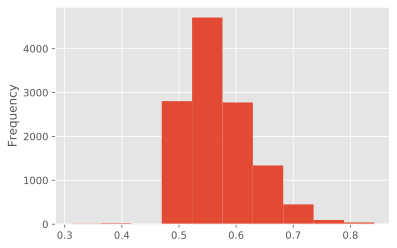

In [36]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df['manifestolabel_proba'].plot.hist()

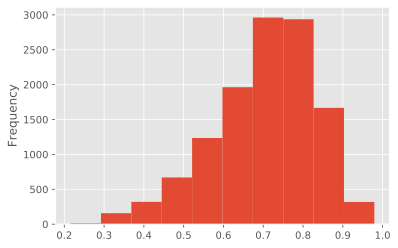

In [37]:
df['domain_proba'].plot.hist()

<Figure size 360x1080 with 0 Axes>

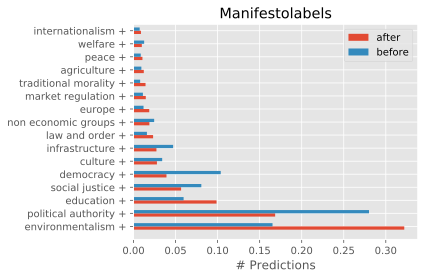

In [44]:
plt.figure(figsize=[5,15]);
ddd = pd.DataFrame(
    [df.loc[df['after'],'manifestolabel'].value_counts(normalize=True), 
     df.loc[df['before'],'manifestolabel'].value_counts(normalize=True)],
    index=['after','before']).T

ddd[abs(ddd['after'] / ddd['before'] - 1) > .1].plot.barh()

plt.ylim([-1,15.5])
plt.title('Manifestolabels')
plt.xlabel('# Predictions')
plt.tight_layout()
plt.savefig('manifestolabels_before_after.pdf')

<Figure size 360x1080 with 0 Axes>

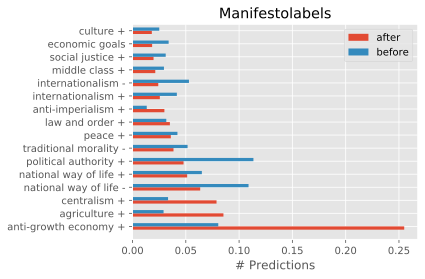

In [39]:
plt.figure(figsize=[5,15])

ddd = pd.DataFrame(
    [df.loc[df['after'],'manifestolabel_keywords'].value_counts(normalize=True), 
     df.loc[df['before'],'manifestolabel_keywords'].value_counts(normalize=True)],
    index=['after','before']).T

ddd[abs(ddd['after'] / ddd['before'] - 1) > .1].plot.barh()


plt.ylim([-1,15.5])
plt.title('Manifestolabels')
plt.xlabel('# Predictions')
plt.tight_layout()
plt.savefig('manifestolabels_before_after_keywords.pdf')

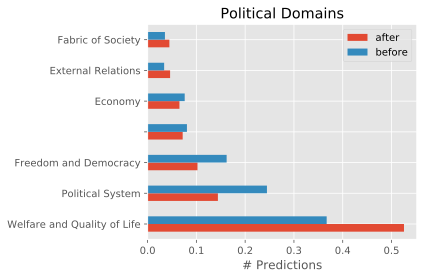

In [40]:
ddd = pd.DataFrame(
    [df.loc[df['after'],'domain'].value_counts(normalize=True), 
     df.loc[df['before'],'domain'].value_counts(normalize=True)],
    index=['after','before']).T

ddd[abs(ddd['after'] / ddd['before'] - 1) > .01].plot.barh()



plt.title('Political Domains')
plt.xlabel('# Predictions')
plt.tight_layout()
plt.savefig('domains_before_after.pdf')

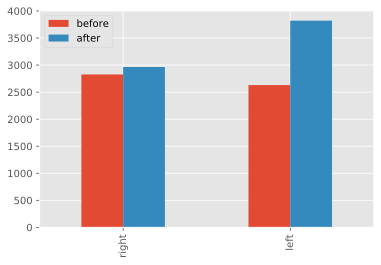

In [41]:
pd.DataFrame(
    [df.loc[df['before'],'rightleft'].value_counts(), 
     df.loc[df['after'],'rightleft'].value_counts()],
    index=['before','after']).T.plot.bar()


In [61]:
from classifier import get_manifesto_data
df = get_manifesto_data()
df

Loading manifesto/manifesto-Germany.csv


,text,manifestocodes,domain,rightleft,manifestolabel
0,Es ist Zeit für einen Wechsel,0,None,None,undefined
1,"Die Bundesrepublik braucht eine neue, eine soziale und ökologische Politik",303,Political System,None,gov-admin efficiency +
2,Die Herausforderungen eines neuen Jahrhunderts sind nicht mit den Konzepten von gestern und vorgestern zu bewältigen,303,Political System,None,gov-admin efficiency +
3,Politik kann nicht alle Probleme lösen,0,None,None,undefined
4,Aber Politik muß ihren Teil zur Lösung der Probleme beitragen,0,None,None,undefined
...,...,...,...,...,...
48471,Deutschland braucht qualifizierte und integrationswillige Zuwanderung.,608,Fabric of Society,None,multiculturalism -
48472,• Wir fordern ein Einwanderungsgesetz nach kanadischem Vorbild.,607,Fabric of Society,None,multiculturalism +
48473,Eine ungeordnete Zuwanderung in unsere Sozialsysteme muss unbedingt unterbunden werden.,601,Fabric of Society,right,national way of life +
48474,• Ernsthaft politisch Verfolgte müssen in Deutschland Asyl finden können.,201,Freedom and Democracy,right,freedom/human rights +


In [31]:
from classifier import get_manifesto_data
df = get_manifesto_data()
df['manifestolabel'] = df['manifestocodes'].astype('str') + " " + df['manifestolabel']
# df[['text','manifestolabel']]
df[['text','manifestolabel']].to_json('manifestodata.json')

Loading manifesto/manifesto-Germany.csv
